# BDLE : TP 1 à 3

## Préparation de la base de données

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import re

# choisir un mode d'execution: colaboratory, local ou ppti

EXECUTION='colaboratory'


# Pour le mode local
# IL FAUT LANCER JUPYTER NOTEBOOK EN LOCAL ET CHOISIR ENVIRONNEMENT LOCAL EN HAUT A DROITE
# 
# Assurez-vous que l'extension jupyter_http_over_ws Jupyter est activée et à jour sur votre machine.
# pip install --upgrade jupyter_http_over_ws>=0.0.1a3 && jupyter serv e port 8888 et qu'il accepte les requêtes du site https://colab.research.google.com.
# jupyter notebook   --NotebookApp.allow_origin='https://colab.research.google.com'   --port=8888   --NotebookApp.port_retries=0
# voir aussi https://research.google.com/colaboratory/local-runtimes.html
# 
#EXECUTION='local'

# EXECUTION EN SALLE PPTI
#EXECUTION='ppti'

print('EXECUTION', EXECUTION)

SPARK_VERSION="2.4.4"

if EXECUTION == 'colaboratory':
  HOME="/content"
  DATASET_DIR="/content"
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !ls -ld {os.environ["JAVA_HOME"]}
  #os.environ["SPARK_HOME"] = f"{HOME}/spark-{SPARK_VERSION}-bin-hadoop2.7"
  os.environ["SPARK_HOME"] = "{}/spark-{}-bin-hadoop2.7".format(HOME, SPARK_VERSION)

elif EXECUTION == 'local':
  HOME=os.environ["HOME"]
  DATASET_DIR="{}/dataset".format(HOME)
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  # si pyspark deja installé par "conda"
  # os.environ["SPARK_HOME"] = "{}/anaconda3/bin/spark-{}-bin-hadoop2.7".format(HOME, SPARK_VERSION)
  # si on installe spark directement
  os.environ["SPARK_HOME"] = "{}/spark-{}-bin-hadoop2.7".format(HOME, SPARK_VERSION)

elif EXECUTION == 'ppti':
  HOME=os.environ["HOME"]
  DATASET_DIR="/Infos/bd/spark/dataset"
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  os.environ["SPARK_HOME"] = "/usr/local/spark-{}-bin-hadoop2.7".format(SPARK_VERSION)
else:
    print("Valeur incorrecte pour la variable EXECUTION:", EXECUTION)


print('JAVA_HOME:', os.environ["JAVA_HOME"] )
print('SPARK_HOME:', os.environ["SPARK_HOME"])
print('DATASET_DIR:', DATASET_DIR)
print('HOME:', HOME)

EXECUTION colaboratory
drwxr-xr-x 7 root root 4096 Aug 27 16:12 /usr/lib/jvm/java-8-openjdk-amd64
JAVA_HOME: /usr/lib/jvm/java-8-openjdk-amd64
SPARK_HOME: /content/spark-2.4.4-bin-hadoop2.7
DATASET_DIR: /content
HOME: /content


### Téléchargements

#### Spark

In [2]:
import os.path
from os import path

if EXECUTION == 'ppti':
  print("on ne telecharge pas spark")  
else:
  if (path.isdir(HOME+"/spark-"+SPARK_VERSION+"-bin-hadoop2.7")):
    print(HOME+"/spark-"+SPARK_VERSION+"-bin-hadoop2.7 exists.")
  else:
    CLOSER_LOCATION = "https://www.apache.org/dyn/closer.lua/spark/spark-{}/spark-{}-bin-hadoop2.7.tgz".format(SPARK_VERSION, SPARK_VERSION)
    # !wget http://mirror.ibcp.fr/pub/apache/spark/spark-{SPARK_VERSION}/spark-{SPARK_VERSION}-bin-hadoop2.7.tgz
    !wget {CLOSER_LOCATION} -O suggest.html
    !wget `grep "suggest the following mirror" -A2 suggest.html |grep -Po 'href="\K[^"]*'` -O {HOME}/spark-{SPARK_VERSION}-bin-hadoop2.7.tgz
    !cd {HOME} && tar xzf spark-{SPARK_VERSION}-bin-hadoop2.7.tgz && rm spark-{SPARK_VERSION}-bin-hadoop2.7.tgz
    !rm suggest.html
    !echo "spark installé dans {HOME}/spark-{SPARK_VERSION}-bin-hadoop2.7"
    !ls -ld {os.environ["SPARK_HOME"]}
    

# Rmq: une autre méthode possible pour télécharger spark: est :  !pip install pyspark

/content/spark-2.4.4-bin-hadoop2.7 exists.


#### findspark

In [3]:
if EXECUTION == 'ppti' :
  !ls -l /Infos/bd/spark/python/findspark.py
else :
  !pip install findspark

#### demarrer_spark_colab.py

In [4]:
# URL du dossier PUBLIC_DATASET contenant des fichiers
PUBLIC_DATASET="https://nuage.lip6.fr/s/PQM3RgR4FRnMPQ9/download?path="

if EXECUTION == 'ppti' :
  !ls -l /Infos/bd/spark/python/demarrer_spark.py
else :
  if (path.isfile("demarrer_spark.py")):
     print("demarrer_spark.py exists.")
  else:
     !wget {PUBLIC_DATASET}/python/demarrer_spark.py -O demarrer_spark.py

demarrer_spark.py exists.


#### IMDB

In [5]:
if EXECUTION == 'ppti' :
  !ls -ld {DATASET_DIR}/imdb/vldb2015
  
else :
  if (path.isdir(DATASET_DIR+"/imdb/vldb2015")):
    print(DATASET_DIR+"/imdb/vldb2015 exists.")
  else:
    !mkdir -p {DATASET_DIR}/imdb/vldb2015

    # les donnees entières (1.18GO)
    #!wget {PUBLIC_DATASET}/imdb/vldb2015/csvfiles.tgz -O imdb/vldb2015/csvfiles.tgz
    #!cd imdb/vldb2015 && tar zxf csvfiles.tgz && rm csvfiles.tgz
    #dir = 'imdb//vldb2015/csvfiles/'

    ## Effacer dataset complet
    #!cd 
    #!ls imdb
    #!rm -rf imdb/csvfiles

    # un sample basé sur 1% des films
    !wget {PUBLIC_DATASET}/imdb/vldb2015/csvfiles_sample001.tgz -O {DATASET_DIR}/imdb/vldb2015/csvfiles_sample001.tgz
    !cd {DATASET_DIR}/imdb/vldb2015 && tar zxf csvfiles_sample001.tgz && rm csvfiles_sample001.tgz
    print("dataset téléchargé")

/content/imdb/vldb2015 exists.


#### Movielens

In [6]:
if EXECUTION == 'ppti' :
  !ls -ld {DATASET_DIR}/movielens
else :
  if (path.isdir(DATASET_DIR+"/movielens")):
    print(DATASET_DIR+"/movielens exists.")
  else:
    !mkdir -p {DATASET_DIR}/movielens
    !wget {PUBLIC_DATASET}/movielens/ml-latest-small.zip -O {DATASET_DIR}/movielens/ml-latest-small.zip
    !cd {DATASET_DIR}/movielens && unzip ml-latest-small.zip  && rm ml-latest-small.zip
    print("dataset movielens téléchargé")

/content/movielens exists.


télécharger la définition des tables imdb

In [7]:
if EXECUTION == 'ppti':
  !cp {DATASET_DIR}/imdb/vldb2015/tables_imdb.py tables_imdb.py
else:
  if (path.isfile("tables_imdb.py")):
    print("tables_imdb.py exists.")
  else:
    !wget {PUBLIC_DATASET}/imdb/vldb2015/tables_imdb.py -O tables_imdb.py

tables_imdb.py exists.


#### IMDB 2019

In [8]:
if EXECUTION == 'ppti' :
  !ls -ld {DATASET_DIR}/imdb/complete
  
else :
  if (path.isdir(DATASET_DIR+"/imdb/complete")):
    print(DATASET_DIR+"/imdb/complete exists.")
  else:
    !mkdir -p {DATASET_DIR}/imdb/complete
    # les donnees entières 
    # !wget https://datasets.imdbws.com/name.basics.tsv.gz -O imdb/complete/name.basics.tsv.gz
    !wget https://datasets.imdbws.com/title.akas.tsv.gz -O imdb/complete/title.akas.tsv.gz
    !wget https://datasets.imdbws.com/title.basics.tsv.gz -O imdb/complete/title.basics.tsv.gz
    # !wget https://datasets.imdbws.com/title.crew.tsv.gz -O imdb/complete/title.crew.tsv.gz
    # !wget https://datasets.imdbws.com/title.episode.tsv.gz -O imdb/complete/title.episode.tsv.gz
    # !wget https://datasets.imdbws.com/title.principals.tsv.gz -O imdb/complete/title.principals.tsv.gz
    !wget https://datasets.imdbws.com/title.ratings.tsv.gz -O imdb/complete/title.ratings.tsv.gz
    !cd imdb/complete && gunzip *.gz 
    dir = 'imdb/complete/csvfiles/'

    ## Effacer dataset complet
    #!cd 
    #!ls imdb
    #!rm -rf imdb/csvfiles

    print("dataset téléchargé")

/content/imdb/complete exists.


### Démarrer la session spark

In [9]:
from demarrer_spark import demarrer_spark

spark = demarrer_spark()

les dossiers contenant les packages

/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
findspark.init() initialise les variables d'environnement pour spark
import fait
session démarrée, son id est  local-1570728320298


### Définir l'accès aux fichiers de données

#### Définition tables IMDB

In [10]:
from tables_imdb import lire_tables
dir = "{}/imdb/vldb2015/csvfiles_sample001/".format(DATASET_DIR)

title, kind_type, movie_info, info_type, cast_info, role_type, name,  \
person_info, movie_companies, company_name,company_type \
= lire_tables(spark, dir)

print("tables définies")

tables définies


In [11]:
title.count()

25084

#### Définition tables Movielens

In [12]:
    #==============
    # Ratings
    #==============
    schema_ratings = """
          userId INT, 
          movieId INT, 
          rating FLOAT, 
          timestamp INT
        """

    ratings = spark.read.option("header","true").csv(path = DATASET_DIR+"/movielens/ml-latest-small/ratings.csv", schema = schema_ratings).persist()
    ratings.createOrReplaceTempView("Ratings")
    #title.printSchema()

    schema_links = """
          movieId INT, 
          imdbId INT, 
          tmdbId INT
        """

    links = spark.read.option("header","true").csv(path = DATASET_DIR+"/movielens/ml-latest-small/links.csv", schema = schema_links).persist()
    links.createOrReplaceTempView("Links")


ratings.show(5)
links.show(5)


# charger tags et movies ...


+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|     31|   2.5|1260759144|
|     1|   1029|   3.0|1260759179|
|     1|   1061|   3.0|1260759182|
|     1|   1129|   2.0|1260759185|
|     1|   1172|   4.0|1260759205|
+------+-------+------+----------+
only showing top 5 rows

+-------+------+------+
|movieId|imdbId|tmdbId|
+-------+------+------+
|      1|114709|   862|
|      2|113497|  8844|
|      3|113228| 15602|
|      4|114885| 31357|
|      5|113041| 11862|
+-------+------+------+
only showing top 5 rows



In [0]:
# ratings.count()
# links.printSchema()


#### Definition table IMDB Complete

https://www.imdb.com/interfaces/

In [13]:
    #==============
    # Ratings
    #==============
    schema = """
          tconst STRING, 
          averageRating FLOAT, 
          numVotes INT
        """

    imdb_ratings = spark.read.format("csv").option("header", "true").option("delimiter", "\t").schema(schema).load(DATASET_DIR+"/imdb/complete/title.ratings.tsv").persist()
    imdb_ratings.createOrReplaceTempView("IMDB_Ratings")
    imdb_ratings.printSchema()

    #==============
    # AKAS
    #==============
    schema = """
          titleId STRING, 
          ordering INT, 
          title STRING,
          region STRING,
          language STRING,
          types STRING,
          attributes STRING,
          isOriginalkTitle INT
        """

    imdb_akas = spark.read.format("csv").option("header", "true").option("delimiter", "\t").schema(schema).load(DATASET_DIR+"/imdb/complete/title.akas.tsv").persist()
    imdb_akas.createOrReplaceTempView("IMDB_Akas")
    imdb_akas.printSchema()

    imdb_ratings.show(5)
    imdb_akas.show(5)

root
 |-- tconst: string (nullable = true)
 |-- averageRating: float (nullable = true)
 |-- numVotes: integer (nullable = true)

root
 |-- titleId: string (nullable = true)
 |-- ordering: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- region: string (nullable = true)
 |-- language: string (nullable = true)
 |-- types: string (nullable = true)
 |-- attributes: string (nullable = true)
 |-- isOriginalkTitle: integer (nullable = true)

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.6|    1538|
|tt0000002|          6.1|     186|
|tt0000003|          6.5|    1199|
|tt0000004|          6.2|     114|
|tt0000005|          6.1|    1912|
+---------+-------------+--------+
only showing top 5 rows

+---------+--------+--------------------+------+--------+-----------+----------+----------------+
|  titleId|ordering|               title|region|language|      types|attributes|isOriginalkTitle|
+-----

In [14]:
     
   


schema = """
      tconst STRING, 
      titleType STRING,
      primaryTitle STRING,
      originalTitle STRING,
      isAdult INT,
      startYear INT,
      endYear INT,
      runtimeMinutes INT,
      genres STRING
    """

imdb_basics = spark.read.format("csv").option("header", "true").option("delimiter", "\t").schema(schema).load(DATASET_DIR+"/imdb/complete/title.basics.tsv").persist()
imdb_basics.createOrReplaceTempView("IMDB_Basics")
imdb_basics.printSchema()


imdb_basics.show(5)

   
    

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: integer (nullable = true)
 |-- startYear: integer (nullable = true)
 |-- endYear: integer (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- genres: string (nullable = true)

+------+---------+------------+-------------+-------+---------+-------+--------------+------+
|tconst|titleType|primaryTitle|originalTitle|isAdult|startYear|endYear|runtimeMinutes|genres|
+------+---------+------------+-------------+-------+---------+-------+--------------+------+
|  null|     null|        null|         null|   null|     null|   null|          null|  null|
|  null|     null|        null|         null|   null|     null|   null|          null|  null|
|  null|     null|        null|         null|   null|     null|   null|          null|  null|
|  null|     null|        null|         null|   null|  

## TP 1 : Premières analyses

### Les sociétés de production

#### Nombre de sociétés de production

In [15]:
spark.sql("""SELECT count(*) FROM Company_name""").show()

+--------+
|count(1)|
+--------+
|   11470|
+--------+



#### Les caractéristiques des sociétés de production

In [16]:
company_type.show(truncate = False)

+---+-------------------------+
|id |kind                     |
+---+-------------------------+
|1  |distributors             |
|2  |production companies     |
|3  |special effects companies|
|4  |miscellaneous companies  |
+---+-------------------------+



#### Nombre de films par type de sociétés de production

In [17]:
r = spark.sql("""
SELECT kind, count(*) as nb_of_films
FROM Movie_Companies 
JOIN Company_Type on Movie_Companies.company_type_id = Company_Type.id
group by kind 
order by nb_of_films desc
""")
r.show()


+--------------------+-----------+
|                kind|nb_of_films|
+--------------------+-----------+
|production companies|      13345|
|        distributors|      12732|
+--------------------+-----------+



#### Nombre de films pour les plus grosses sociétés

In [18]:
nb_films_per_societies = spark.sql("""
SELECT name, count(*) as nb_of_films
FROM Movie_Companies 
JOIN Company_Type on Movie_Companies.company_type_id = Company_Type.id
JOIN Company_name on Company_name.id = Movie_Companies.company_id
GROUP BY Company_name.name
ORDER BY nb_of_films desc
""")
nb_films_per_societies.persist()
nb_films_per_societies.show(truncate = False)

+--------------------------------------+-----------+
|name                                  |nb_of_films|
+--------------------------------------+-----------+
|Columbia Broadcasting System (CBS)    |633        |
|National Broadcasting Company (NBC)   |469        |
|American Broadcasting Company (ABC)   |343        |
|British Broadcasting Corporation (BBC)|284        |
|Warner Home Video                     |193        |
|ABS-CBN                               |143        |
|General Film Company                  |134        |
|Pathé Frères                          |131        |
|Paramount Pictures                    |102        |
|Universal Pictures                    |100        |
|Metro-Goldwyn-Mayer (MGM)             |99         |
|Universal Film Manufacturing Company  |94         |
|Warner Bros. Television               |91         |
|Granada Television                    |83         |
|Warner Bros                           |82         |
|Zweites Deutsches Fernsehen (ZDF)     |69    

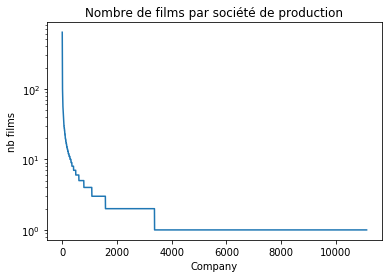

In [19]:
nb_films_per_societies_to_python = nb_films_per_societies.collect()

tabNbFilms = [x.nb_of_films for x in nb_films_per_societies_to_python]

plt.yscale('log')
plt.plot(tabNbFilms) 
plt.xlabel('Company')
plt.ylabel('nb films')
plt.title('Nombre de films par société de production')
plt.show()


#### Nombre de sociétés par type

In [20]:
spark.sql("""
SELECT kind, count(DISTINCT name) as nombre
FROM Movie_Companies 
JOIN Company_Type on Movie_Companies.company_type_id = Company_Type.id
JOIN Company_name on Company_name.id = Movie_Companies.company_id
GROUP BY kind
""").show(truncate = False)

+--------------------+------+
|kind                |nombre|
+--------------------+------+
|production companies|7906  |
|distributors        |4541  |
+--------------------+------+



### Les caractéristiques des films

Nombre de caractéristiques différentes

In [21]:
spark.sql("SELECT count(*) FROM Info_type").show()

+--------+
|count(1)|
+--------+
|     113|
+--------+



In [22]:
info_type.show()

+---+------------------+
| id|              info|
+---+------------------+
|  1|          runtimes|
|  2|        color info|
|  3|            genres|
|  4|         languages|
|  5|      certificates|
|  6|         sound mix|
|  7|         tech info|
|  8|         countries|
|  9|          taglines|
| 10|          keywords|
| 11|alternate versions|
| 12|     crazy credits|
| 13|             goofs|
| 14|        soundtrack|
| 15|            quotes|
| 16|     release dates|
| 17|            trivia|
| 18|         locations|
| 19|    mini biography|
| 20|       birth notes|
+---+------------------+
only showing top 20 rows



Proportion des films possédant chaque caractéristique

In [23]:
spark.sql("""SELECT Info_type.info, count(DISTINCT movie_id) as nb_films, (ROUND(count(DISTINCT movie_id) / (SELECT count(*) FROM Title), 3)) as proportion_films
          FROM Movie_info
          JOIN Info_type ON Movie_info.info_type_id = Info_type.id
          GROUP BY Info_type.info
          ORDER BY proportion_films DESC
          """).show(truncate = False)

+---------------------+--------+----------------+
|info                 |nb_films|proportion_films|
+---------------------+--------+----------------+
|release dates        |21819   |0.87            |
|color info           |12576   |0.501           |
|countries            |12478   |0.497           |
|languages            |12281   |0.49            |
|genres               |8735    |0.348           |
|runtimes             |7626    |0.304           |
|tech info            |4825    |0.192           |
|sound mix            |4590    |0.183           |
|locations            |3759    |0.15            |
|plot                 |3014    |0.12            |
|certificates         |2144    |0.085           |
|trivia               |1329    |0.053           |
|budget               |1197    |0.048           |
|taglines             |1004    |0.04            |
|quotes               |883     |0.035           |
|copyright holder     |602     |0.024           |
|goofs                |441     |0.018           |


Qu'est ce que 'color info'?

In [24]:
spark.sql("""SELECT DISTINCT Movie_info.info
          FROM Movie_info
          JOIN Info_type ON Movie_info.info_type_id = Info_type.id
          WHERE Info_type.info = 'color info'
          """).show(truncate = False)

+---------------+
|info           |
+---------------+
|Black and White|
|Color          |
+---------------+



#### Analyse des durées des films

In [25]:
runtimes = spark.sql("""SELECT Movie_info.info
          FROM Movie_info
          JOIN Info_type ON Movie_info.info_type_id = Info_type.id
          WHERE Info_type.info = 'runtimes'
          """)
runtimes.show()
t_runtimes = runtimes.collect()

+------------+
|        info|
+------------+
|          90|
|         110|
|         113|
|      USA:60|
|  Germany:44|
|          45|
|          15|
|          42|
|          50|
|     USA:220|
|          45|
|          30|
|   Russia:44|
|          15|
|          25|
|          30|
|          60|
|Argentina:90|
|      USA:41|
|          60|
+------------+
only showing top 20 rows



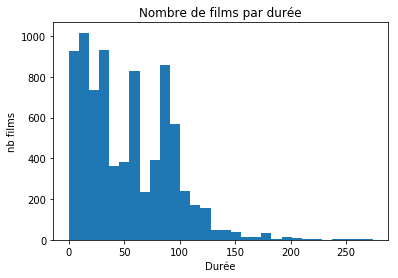

In [26]:
tabRuntimes = [float(re.split(',| |"',x.info.split(':')[-1])[0]) for x in t_runtimes]
tabRuntimes.sort()
plt.hist(tabRuntimes[:-20], bins=30) 
plt.xlabel('Durée')
plt.ylabel('nb films')
plt.title('Nombre de films par durée')
plt.show()

## TP2: requêtes avec rollup et cube

### Dates de naissance des personnes - ROLLUP

#### Traitement préliminaire des données

In [27]:
birth = spark.sql("""
select  n.name, p.info
from Name n, Person_info p, Info_type i
where n.id = p.person_id and p.info_type_id = i.id
and i.info = 'birth date'
""")
birth.show(5,False)

+------------------+-----------------+
|name              |info             |
+------------------+-----------------+
|5, Johnny         |7 September 1984 |
|50 Cent           |6 July 1975      |
|Aaker, Lee        |25 September 1943|
|Aames, Willie     |15 July 1960     |
|Abatantuono, Diego|20 May 1955      |
+------------------+-----------------+
only showing top 5 rows



On sépare les dates de naissance en liste [jour, mois, année] :

In [28]:
birthTab = spark.sql("""
select  n.name, split(p.info, ' ') as birth_date
from Name n, Person_info p, Info_type i
where n.id = p.person_id and p.info_type_id = i.id
and i.info = 'birth date'
""")
birthTab.show(5,False)
birthTab.createOrReplaceTempView('birthTab')

+------------------+---------------------+
|name              |birth_date           |
+------------------+---------------------+
|5, Johnny         |[7, September, 1984] |
|50 Cent           |[6, July, 1975]      |
|Aaker, Lee        |[25, September, 1943]|
|Aames, Willie     |[15, July, 1960]     |
|Abatantuono, Diego|[20, May, 1955]      |
+------------------+---------------------+
only showing top 5 rows



On sépare dans différentes colonnes

In [29]:
birthDayMonthYear = spark.sql("""
select  name, concat_ws('', substring(element_at(birth_date, size(birth_date)), 0, 3), "0's") as decade,
            trim(element_at(birth_date, size(birth_date))) as year, 
            trim(element_at(birth_date, size(birth_date)-1)) as month,
            trim(element_at(birth_date, size(birth_date)-2)) as day
from birthTab
where size(birth_date) >=3
""")
birthDayMonthYear.createOrReplaceTempView('birthDayMonthYear')

print(birthDayMonthYear.count())
birthDayMonthYear.show(10,False)

67225
+------------------+------+----+---------+---+
|name              |decade|year|month    |day|
+------------------+------+----+---------+---+
|5, Johnny         |1980's|1984|September|7  |
|50 Cent           |1970's|1975|July     |6  |
|Aaker, Lee        |1940's|1943|September|25 |
|Aames, Willie     |1960's|1960|July     |15 |
|Abatantuono, Diego|1950's|1955|May      |20 |
|Abbas, Abdullah   |1900's|1906|November |15 |
|Abbas, Zaheer     |1940's|1947|July     |24 |
|Abbott, Bud       |1890's|1895|October  |2  |
|Abbott, Fredric   |1920's|1928|October  |16 |
|Abbott, Philip    |1920's|1923|March    |21 |
+------------------+------+----+---------+---+
only showing top 10 rows



On remarque que les mois sont codés avec leur nom. Pour les afficher dans l'ordre, on les recodes avec leur numéro.

In [30]:
from pyspark import SparkContext
sc =SparkContext.getOrCreate()
newJson = '[{"Month":"January","Number":"01"}, \
{"Month":"February","Number":"02"}, \
{"Month":"March","Number":"03"}, \
{"Month":"April","Number":"04"}, \
{"Month":"May","Number":"05"}, \
{"Month":"June","Number":"06"}, \
{"Month":"July","Number":"07"}, \
{"Month":"August","Number":"08"}, \
{"Month":"September","Number":"09"}, \
{"Month":"October","Number":"10"}, \
{"Month":"November","Number":"11"}, \
{"Month":"December","Number":"12"}]'
month2number = spark.read.json(sc.parallelize([newJson]))
month2number.createOrReplaceTempView('month2number')
month2number.show(truncate=False)

+---------+------+
|Month    |Number|
+---------+------+
|January  |01    |
|February |02    |
|March    |03    |
|April    |04    |
|May      |05    |
|June     |06    |
|July     |07    |
|August   |08    |
|September|09    |
|October  |10    |
|November |11    |
|December |12    |
+---------+------+



#### ROLLUP

In [31]:
r = spark.sql("""
select  decade, year, month2number.Number as num_month, count(*) as nb
from birthDayMonthYear b, month2number
where b.month = month2number.Month
and year >= 1900 and year < 2000
group by ROLLUP (decade, year, num_month)
order by decade, year, num_month
""")
print(r.count())
r.show()

1310
+------+----+---------+-----+
|decade|year|num_month|   nb|
+------+----+---------+-----+
|  null|null|     null|61626|
|1900's|null|     null| 3282|
|1900's|1900|     null|  280|
|1900's|1900|       01|   28|
|1900's|1900|       02|   22|
|1900's|1900|       03|   26|
|1900's|1900|       04|   20|
|1900's|1900|       05|   21|
|1900's|1900|       06|   19|
|1900's|1900|       07|   19|
|1900's|1900|       08|   25|
|1900's|1900|       09|   28|
|1900's|1900|       10|   27|
|1900's|1900|       11|   25|
|1900's|1900|       12|   20|
|1900's|1901|     null|  296|
|1900's|1901|       01|   32|
|1900's|1901|       02|   28|
|1900's|1901|       03|   22|
|1900's|1901|       04|   19|
+------+----+---------+-----+
only showing top 20 rows



#### Nombre de personnes nées chaque année

In [32]:
r = spark.sql("""
select  year, count(*) as nb
from birthDayMonthYear b
where year >= 1900 and year < 2000
group by year
order by year
""")
print(r.count())
r.show()
birth_years = r.collect()

100
+----+---+
|year| nb|
+----+---+
|1900|280|
|1901|296|
|1902|293|
|1903|326|
|1904|342|
|1905|341|
|1906|321|
|1907|341|
|1908|385|
|1909|357|
|1910|383|
|1911|377|
|1912|382|
|1913|399|
|1914|420|
|1915|401|
|1916|397|
|1917|367|
|1918|437|
|1919|436|
+----+---+
only showing top 20 rows



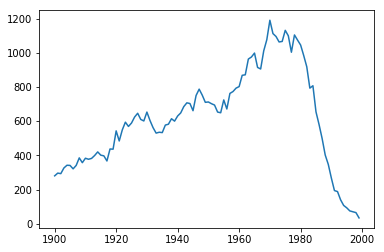

In [33]:
plt.plot([int(x.year) for x in birth_years], [x.nb for x in birth_years])
plt.show()

### Budget en fonction du type, production year, size of cast - CUBE

In [34]:
budget = spark.sql("""

select t.id, k.kind, concat(pow(10, floor(log10(count(c.id)))), '-', pow(10, 1+floor(log10(count(c.id))))) size_of_cast, t.production_year, cast(replace(regexp_extract(m.info, '([0-9,]+)', 1), ',' '') as int) as budget
from Title t, Kind_Type k, Movie_info m, Info_type i, Cast_Info c
where t.kind_id = k.id and t.id = m.movie_id and m.info_type_id = i.id and t.id = c.movie_id
and i.info = 'budget'
group by t.id, k.kind, t.production_year, m.info
order by budget DESC
""")
budget.createOrReplaceTempView('budget')

budget.show(10)
budget.count() #1192

+-------+---------+------------+---------------+---------+
|     id|     kind|size_of_cast|production_year|   budget|
+-------+---------+------------+---------------+---------+
| 237637|tv series|  10.0-100.0|           1979|300000000|
|2510177|    movie|  10.0-100.0|           2001|160000000|
|2457994|    movie|  10.0-100.0|           2011|150000000|
|2418323|    movie|100.0-1000.0|           2009|100000000|
|1974061|    movie|  10.0-100.0|           1997|100000000|
|1635380|    movie|100.0-1000.0|           2000| 85000000|
|2117152|    movie|  10.0-100.0|           2013| 80000000|
|2436413|    movie|  10.0-100.0|           2012| 80000000|
|1705432|    movie|    1.0-10.0|           2013| 75000000|
|2409929|    movie|100.0-1000.0|           1997| 68000000|
+-------+---------+------------+---------------+---------+
only showing top 10 rows



1192

In [35]:
budgetByMovieType_MovieSize_ProductionYear = spark.sql("""

select concat(substring(b.production_year, 0, 3), "0's") as decade, kind, size_of_cast, count(*) as nbMovies,
      round(avg(budget),0) as avgBudget
from Budget b
where b.production_year > 1950
group by CUBE(decade, kind, size_of_cast)
order by decade, kind, size_of_cast 
""")


budgetByMovieType_MovieSize_ProductionYear.show(50)

+------+-----------+------------+--------+-----------+
|decade|       kind|size_of_cast|nbMovies|  avgBudget|
+------+-----------+------------+--------+-----------+
|  null|       null|        null|    1175|  2549630.0|
|  null|       null|    1.0-10.0|     427|  1144899.0|
|  null|       null|  10.0-100.0|     718|  2651119.0|
|  null|       null|100.0-1000.0|      30|2.0114667E7|
|  null|    episode|        null|      10|  2263000.0|
|  null|    episode|    1.0-10.0|       3|    90000.0|
|  null|    episode|  10.0-100.0|       7|  3194286.0|
|  null|      movie|        null|     914|  2577977.0|
|  null|      movie|    1.0-10.0|     298|  1009523.0|
|  null|      movie|  10.0-100.0|     589|  2467051.0|
|  null|      movie|100.0-1000.0|      27|2.2308889E7|
|  null|   tv movie|        null|      67|   559858.0|
|  null|   tv movie|    1.0-10.0|      35|   336400.0|
|  null|   tv movie|  10.0-100.0|      31|   809242.0|
|  null|   tv movie|100.0-1000.0|       1|   650000.0|
|  null|  

## TP 3 : Requêtes avec fenêtre

### Evolution du budget moyen par genre de film

Définition de la table de base

In [36]:
budget = spark.sql("""

select t.id, t.production_year, cast(replace(regexp_extract(m.info, '([0-9,]+)', 1), ',' '') as int) as budget
from Title t, Kind_Type k, Movie_info m, Info_type i, Cast_Info c
where t.kind_id = k.id and t.id = m.movie_id and m.info_type_id = i.id and t.id = c.movie_id
and i.info = 'budget'
group by t.id, k.kind, t.production_year, m.info
order by budget DESC
""")
budget.createOrReplaceTempView('budget')

budget.show(10)
budget.count() #1192

+-------+---------------+---------+
|     id|production_year|   budget|
+-------+---------------+---------+
| 237637|           1979|300000000|
|2510177|           2001|160000000|
|2457994|           2011|150000000|
|2418323|           2009|100000000|
|1974061|           1997|100000000|
|1635380|           2000| 85000000|
|2117152|           2013| 80000000|
|2436413|           2012| 80000000|
|1705432|           2013| 75000000|
|2409929|           1997| 68000000|
+-------+---------------+---------+
only showing top 10 rows



1192

In [37]:
r = spark.sql("""
select t.production_year, SUM(b.budget) as budget_total, m.info as genre, count(DISTINCT t.id) as nb_films
  from  Title t, Movie_info m, Info_type i, budget b
  where t.id = m.movie_id and m.info_type_id = i.id and t.id = b.id and t.production_year > 1930
  and i.info = 'genres'
  group by t.production_year, genre
  order by production_year
""")
r.createOrReplaceTempView('budgetPerYearGenre')
r.show()

+---------------+------------+--------+--------+
|production_year|budget_total|   genre|nb_films|
+---------------+------------+--------+--------+
|           1931|      502000|   Drama|       1|
|           1931|      502000|  Comedy|       1|
|           1931|      502000| Romance|       1|
|           1932|      408000|   Drama|       1|
|           1933|      421496|  Comedy|       1|
|           1933|      421496|   Drama|       1|
|           1944|       75000|   Crime|       1|
|           1944|       75000|  Horror|       1|
|           1944|       75000|Thriller|       1|
|           1944|       75000|   Drama|       1|
|           1944|       75000| Mystery|       1|
|           1944|       75000|  Comedy|       1|
|           1945|     3500000|  Comedy|       1|
|           1945|     3500000| Romance|       1|
|           1945|     3500000|   Drama|       1|
|           1949|     2600000| Romance|       1|
|           1949|       10000|   Music|       1|
|           1949|   

#### Les années et les genres avec le plus grand budget

Le gagnant est le genre biographique en 1979 avec un seul film !

In [38]:
r = spark.sql("""
select b.*, rank() over (order by budget_total desc) as classement
from budgetPerYearGenre b
where b.production_year > 1920
""")
r.show(20)

+---------------+------------+---------+--------+----------+
|production_year|budget_total|    genre|nb_films|classement|
+---------------+------------+---------+--------+----------+
|           1979|   300000000|Biography|       1|         1|
|           2001|   210000000|  Romance|       2|         2|
|           1997|   168000000| Thriller|       2|         3|
|           2001|   165065500|    Drama|       6|         4|
|           2001|   160000000|  Musical|       1|         5|
|           2011|   150040000|  Romance|       3|         6|
|           2009|   150014800|    Crime|       7|         7|
|           2009|   103549000|   Action|       7|         8|
|           2009|   103069914|    Drama|      41|         9|
|           2009|   101549000| Thriller|       9|        10|
|           2000|   101023500|   Comedy|       5|        11|
|           2013|   100880000|Adventure|       5|        12|
|           2012|    97503110|   Action|       7|        13|
|           2012|    933

On va voir le nom du film : il s'agit de Cinema!!!, un film italien avec un budget de 300 000 000 de lires italiennes (soit environ 500 000 dollars...)

In [39]:
r=spark.sql("""
select t.title, t.production_year, cast(replace(regexp_extract(m.info, '([0-9,]+)', 1), ',' '') as int) as budget
from Title t, Movie_info m, Info_type i
where t.id = m.movie_id and m.info_type_id = i.id
and i.info = 'budget' and t.production_year=='1979'
order by budget DESC
""")
r.show()

+--------------------+---------------+---------+
|               title|production_year|   budget|
+--------------------+---------------+---------+
|           Cinema!!!|           1979|300000000|
|          L'umanoide|           1979|  7000000|
|Freddy Hubbard Li...|           1979|   168000|
+--------------------+---------------+---------+



#### Les années et les genres avec le plus de films

In [40]:
r = spark.sql("""
select b.*, rank() over (order by nb_films desc) as classement
from budgetPerYearGenre b
where b.production_year > 1920
""")
r.show(20)

+---------------+------------+------+--------+----------+
|production_year|budget_total| genre|nb_films|classement|
+---------------+------------+------+--------+----------+
|           2009|     2785736| Short|      72|         1|
|           2011|     3469545| Short|      72|         1|
|           2008|    36184130| Short|      70|         3|
|           2012|      762427| Short|      64|         4|
|           2010|    35872255| Short|      56|         5|
|           2007|     3859850| Short|      50|         6|
|           2010|    77327098| Drama|      44|         7|
|           2006|     3443299| Short|      43|         8|
|           2009|   103069914| Drama|      41|         9|
|           2008|    51648830| Drama|      37|        10|
|           2005|      452370| Short|      33|        11|
|           2011|    75280200| Drama|      33|        11|
|           2012|    93391460|Comedy|      32|        13|
|           2010|    53857050|Comedy|      31|        14|
|           20

#### Moyennage du budget sur 15 années glissantes et visualisation

In [41]:
r = spark.sql("""
select b.*,
       0.067*SUM(budget_total) over (partition by genre order by production_year range between 7 preceding and 7 following) as budgetMoyenSur15ans
from budgetPerYearGenre b
where b.production_year > 1920
""")
r.show(20)
budgetPerYearGenre = r.collect()

+---------------+------------+-------+--------+-------------------+
|production_year|budget_total|  genre|nb_films|budgetMoyenSur15ans|
+---------------+------------+-------+--------+-------------------+
|           1944|       75000|  Crime|       1|           5025.000|
|           1973|         750|  Crime|       1|           1725.250|
|           1974|       25000|  Crime|       1|           1725.250|
|           1994|     9100000|  Crime|       1|        1468238.000|
|           1995|       11000|  Crime|       1|        1468238.000|
|           1996|    12800000|  Crime|       2|        1537248.000|
|           2000|        3000|  Crime|       1|        2754336.500|
|           2003|     1030000|  Crime|       2|       12609091.800|
|           2004|       60000|  Crime|       1|       11761943.800|
|           2005|     4350000|  Crime|       4|       12522950.570|
|           2006|    13755000|  Crime|       5|       12529885.070|
|           2007|         500|  Crime|       1| 

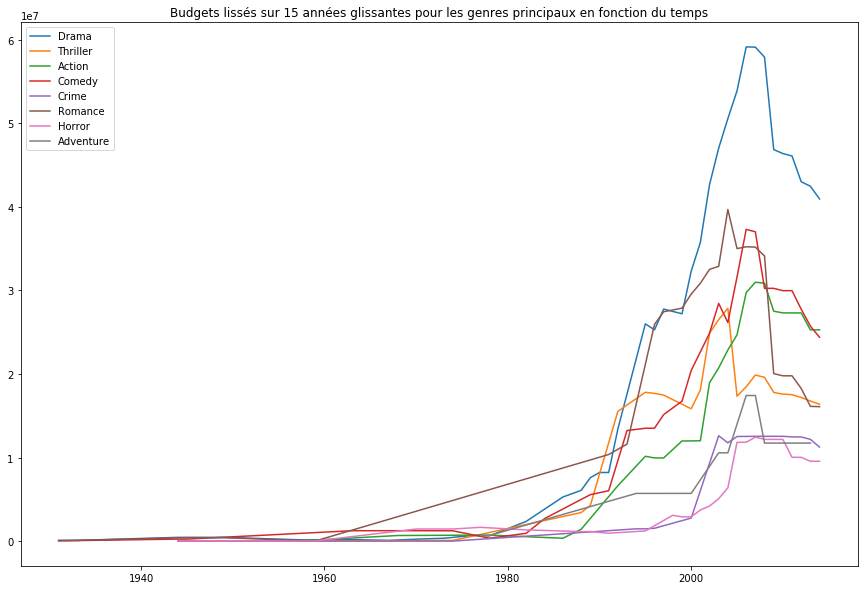

In [42]:
genres = list(set([x.genre for x in budgetPerYearGenre]))
plt.figure(figsize=(15, 10))
#plt.yscale('log')
for genre in genres:
  for y in budgetPerYearGenre:
    if int(y.production_year) >= 2010 and y.genre == genre and float(y.budgetMoyenSur15ans) >= 1e7:
      X = [int(x.production_year) for x in budgetPerYearGenre if x.genre==genre]
      Y = [float(x.budgetMoyenSur15ans) for x in budgetPerYearGenre if x.genre==genre]      
      plt.plot(X, Y, label=genre)
      break
plt.legend()
plt.title('Budgets lissés sur 15 années glissantes pour les genres principaux en fonction du temps')
plt.show()

### Les délais entre deux notes consécutives

In [43]:
userDelaiRating= spark.sql("""
select r.userId as u, (MAX(timestamp) over (partition by r.userId order by timestamp ROWS  between 1 preceding and current row) - MIN(timestamp) over (partition by r.userId order by timestamp ROWS  between 1 preceding and current row)) as delai, r.rating
from Ratings r
order by u
""")
userDelaiRating.show(12)
userDelaiRating.createOrReplaceTempView('userDelaiRating')
user_delai_rating = userDelaiRating.collect()

+---+-----+------+
|  u|delai|rating|
+---+-----+------+
|  1|    3|   3.0|
|  1|    4|   4.0|
|  1|   28|   3.0|
|  1|    4|   3.0|
|  1|    4|   2.5|
|  1|    4|   2.0|
|  1|    3|   2.0|
|  1|    0|   2.0|
|  1|    5|   2.5|
|  1|    8|   3.5|
|  1|    6|   2.0|
|  1|    5|   2.5|
+---+-----+------+
only showing top 12 rows



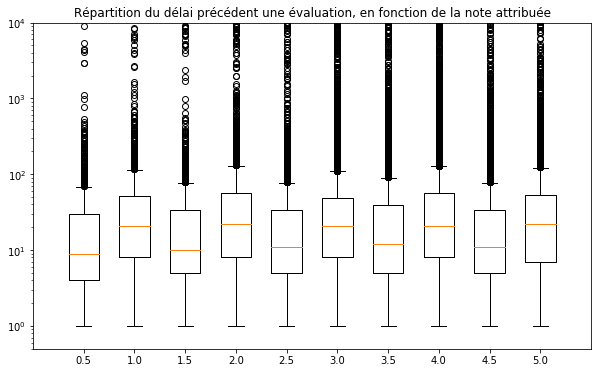

In [44]:
plt.figure(figsize=(10, 6))
plt.yscale('log')
plt.ylim([5e-1, 1e4])
plt.boxplot([[int(x.delai) for x in user_delai_rating if (float(x.rating)==r and int(x.delai) > 0)] for r in np.arange(0.5, 5.5, 0.5)], positions=np.arange(0.5, 5.5, 0.5), widths=0.3)
plt.title('Répartition du délai précédent une évaluation, en fonction de la note attribuée')
plt.show()